# Домашнее задание. Титаник
В этом домашнем задании вам предлагается решить задачу предсказания выживших пассажиров Титаника. Эту задачу машинного обучения рано или поздно решает, наверное, любой, кто обучается анализу данных. Информация о датасете доступна по <a href=https://www.kaggle.com/c/titanic>ссылке</a>.

Кстати, здесь же есть много готовых решений нашей задачи. Решение можно посмотреть в разделе <a href=https://www.kaggle.com/c/titanic/code>code на kaggle</a>.

Некоторые решения, которые уже есть:
https://www.kaggle.com/hacktech33/titanic-solution-xgboost (простое решение)

https://www.kaggle.com/shrutijhaa/in-top-3-titanic-machine-learning-from-disaster (возможно, слишком много визуализации, но хорошее качество)

https://www.kaggle.com/blackhurt/top-3-using-voting-classifier (сильное решение, использует метод простого голосования трёх сильных моделей)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Загрузка данных

Загрузим датасет Titanic из приложенных файлов. В первом файле находится информация о пассажирах, во втором -- информация о том, выжил пассажир или нет.

Если вы запускаете ноутбук на Google Colab, самым простым способом загрузить данные в ноутбук будет примонтировать к Colab ваш Google Drive. Для этого сначала положите в свою корневую директорию Google Drive  файлы, приложенные к этому ноутбуку, а затем выполните три закоментированные строчки в клетке ниже. <a href=https://www.machinelearningmastery.ru/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166/>Подробная инструкция по работе с Google Drive + Google Colab</a>

In [2]:
#from google.colab import drive
#drive.mount('/content/gdrive/')
#data = pd.read_csv('/content/gdrive/My Drive/titanic_data.csv, index_col='PassengerId')

#Если запускаете ноутбук локально:
data = pd.read_csv('titanic_data.csv', index_col='PassengerId')

In [3]:
basic_features = data.columns

y = pd.read_csv('titanic_surv.csv')
y.index = data.index

print(f'Всего {len(data)} пассажиров в выборке')
data.head()

Всего 891 пассажиров в выборке


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
y.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [5]:
data = data.join(y)
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Исследование датасета

### Задание 1 (1 балл)
Опишите датасет. Сколько в нём мужчин, сколько женщин? Посчитайте распределение по классам пассажиров. Используйте функцию ``pd.Series.value_counts``. <a href=https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html>Пример использования</a>

Посчитайте долю выживших мужчин к общему количеству мужчин, а также женщин к общему количеству женщин. Сделайте выводы. 
Проведите схожую аналитику по возрасту выживших и по классу выживших. 

Вам поможет функция ``plt.hist()``. <a href=https://matplotlib.org/3.3.1/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py> Пример использования </a> 

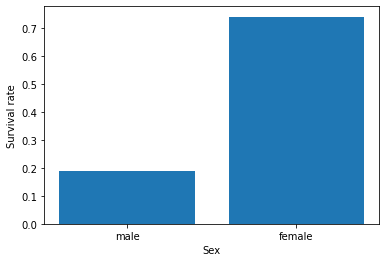

In [6]:
survived_data = data[data['Survived']==1]
plt.bar(['male', 'female'], [len(survived_data[survived_data['Sex']=='male'])/len(data[data['Sex']=='male']), len(survived_data[survived_data['Sex']=='female'])/len(data[data['Sex']=='female'])])
plt.xlabel('Sex')
plt.ylabel('Survival rate')
plt.show()

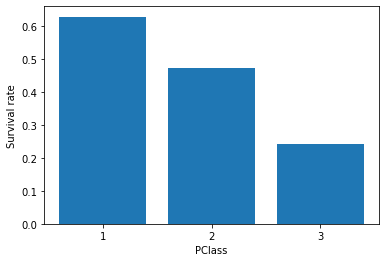

In [7]:
survived_data = data[data['Survived']==1]
plt.bar(range(1, 4), [len(survived_data[survived_data['Pclass']==i])/len(data[data['Pclass']==i]) for i in range(1, 4)])
plt.xticks(range(1, 4))
plt.xlabel('PClass')
plt.ylabel('Survival rate')
plt.show()

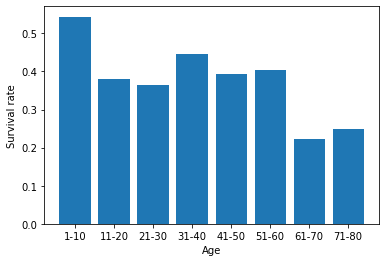

In [8]:
survived_data = data[data['Survived']==1]
plt.bar([str(i) + '-' + str(i+9) for i in range(1, 81, 10)], [len(survived_data[survived_data['Age'].apply(lambda x: (x-1)//10)==i])/len(data[data['Age'].apply(lambda x: (x-1)//10)==i]) for i in range(8)])
plt.xticks([str(i) + '-' + str(i+9) for i in range(1, 81, 10)])
plt.xlabel('Age')
plt.ylabel('Survival rate')
plt.show()

Первый график демонстрирует, что доля выживших женщин значительно превосходит долю выживших мужчин.

Второй график демонстрирует, что процент выживших монотонно убывает с номером класса.

Третий график демонстрирует, что самый большой процент выживших среди детей до 10 лет включительно. На втором месте пассажиры в возрасте 31-40 лет. Меньше всего доля выживших среди пассажиров старше 60.

## Заполнение пропусков в данных
В данных имеются пропуски в трёх колонках: 

In [9]:
data.columns[data.isna().any()].tolist()

['Age', 'Cabin', 'Embarked']

Для простоты заполним все пропуски в категориальных колонках новым классом "0", а в числовой колонке Age --- медианным значением. 

In [10]:
data.loc[:, ['Cabin', 'Embarked']] = data.loc[:, ['Cabin', 'Embarked']].fillna('0')
data['Age'] = data['Age'].fillna(data['Age'].median())

## Подготовка плана тестирования

### Задание 2. (0 баллов)
Разделите выборку на обучающее и тестовое множество в соотношении 70:30.

In [11]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.3)

## Выделение новых признаков
Теперь отложим тестовые данные и приступим к моделированию. Внимательно изучите данные. Можете ли вы выделить признаки, которые не указаны явно в таблице?

### Задание 3 (1 балл)
 Сформируйте по крайней мере один новый признак и объясните ваш выбор. Пример признака сформирован за вас. 

Указания: 
- Пассажиров можно поделить на несколько классов по их именам.
- Различных номеров кают слишком много. Но буквы в номерах кают указывают на их местоположение. (***Этот признак сформирован в примере***)
- Возможно, имеет смысл отделить мальчиков от мужчин. Отделять девочек от женщин может быть не так важно
- Другие идеи для признаков можно почерпнуть на форуме в обсуждении задачи на kaggle.com.

In [12]:
data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0
...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,0
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,0,S,0


In [13]:
data['Cabin']

PassengerId
1         0
2       C85
3         0
4      C123
5         0
       ... 
887       0
888     B42
889       0
890    C148
891       0
Name: Cabin, Length: 891, dtype: object

In [14]:
def get_cabin_letter(row):
    return row['Cabin'][0]

data['cabin_type'] = data.apply(get_cabin_letter, axis=1)

Гонорифики -- слова стоящие перед именем в уважительном обращении. По ним можно определить примерную социальную группу пассажира. 

In [15]:
def get_honorific(row): 
    return row['Name'][row['Name'].find(',') + 2: row['Name'].find('.')+1]

data['honorific'] = data.apply(get_honorific, axis=1) 
data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,cabin_type,honorific
PassengerId,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0,0,Mr.
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C,Mrs.
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1,0,Miss.
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C,Mrs.
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0,0,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,0,0,Rev.
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,B,Miss.
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,0,S,0,0,Miss.


## Кодирование категориальных признаков и обработка данных
Все признаки сейчас делятся на числовые, бинарные, категориальные и текстовые. К текстовым признакам можно отнести имя пассажира, номер билета и номер каюты: значения этих признаков уникальны почти для всех пассажиров, и простого способа использовать их в модели не существует.

### Задание 4 (0 баллов)
Пока используя только изначальные признаки, перекодируйте категориальные признаки функцией ``pd.get_dummies``. Естественно, имена пассажиров и номера билетов и кают кодировать не стоит, поскольку все значения этих признаков уникальные. 

In [16]:
X_train = pd.get_dummies(data_train, columns=['Sex','Embarked']).drop(columns=['Name', 'Ticket', 'Cabin', 'Survived'])
y_train = data_train['Survived']

## Обучение baseline-модели

### Задание 5 (1 балл)

Обучите одну из простых известных вам моделей. Измерьте качество полученной модели на кросс-валидации (используйте только обучающую выборку!)

100%|██████████| 100/100 [00:02<00:00, 36.04it/s]


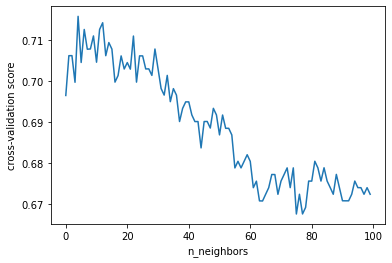

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from tqdm import tqdm

scores = []
for n in tqdm(range(1, 101)):
    model = KNeighborsClassifier(n_neighbors = n)
    scores.append(cross_validate(model, X_train, y_train)['test_score'].mean())
plt.plot(scores)
plt.xlabel('n_neighbors')
plt.ylabel('cross-validation score')
plt.show()

### Задание 6 (1 балл)
Добавьте в модель два новых сгенерированных признака. Если нужно, добавьте признаки, сгенерированные ohe-hot кодированием. Обучите ту же самую модель на расширенном множестве признаков. Улучшилось ли качество предсказания на кросс-валидации?

In [18]:
X = pd.get_dummies(data, columns=['Sex','Embarked', 'cabin_type', 'honorific']).drop(columns=['Name', 'Ticket', 'Cabin', 'Survived'])
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

100%|██████████| 100/100 [00:03<00:00, 32.68it/s]


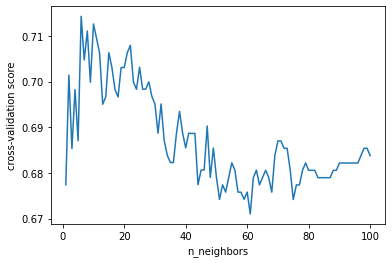

In [19]:
crossval_score = {}
scores = []
for n in tqdm(range(1, 101)):
    model = KNeighborsClassifier(n_neighbors = n)
    scores.append(cross_validate(model, X_train, y_train)['test_score'].mean())
crossval_score['KNN'] = (max(scores), np.argmax(np.asarray(scores))+1)
plt.plot(range(1, 101), scores)
plt.xlabel('n_neighbors')
plt.ylabel('cross-validation score')
plt.show()

## Дополнительное моделирование
### Задание 7 (2 балла)
Теперь более серьёзно подойдём к моделированию. Попробуйте несколько алгоритмов из тех, что мы проходили в курсе. Вам помогут ноутбуки с линейными алгоритмами и выбором модели. Хотя бы для одного алгоритма проведите подбор оптимального гиперпараметра. 

100%|██████████| 10/10 [00:02<00:00,  4.47it/s]


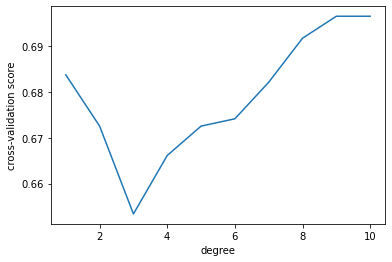

In [20]:
from sklearn.svm import SVC

scores=[]
for n in tqdm(range(1, 11)):
    model = SVC(kernel='poly', degree=n)
    scores.append(cross_validate(model, X_train, y_train)['test_score'].mean())
crossval_score['SVM'] = (max(scores), np.argmax(np.asarray(scores))+1)
plt.plot(range(1, 11), scores)
plt.xlabel('degree')
plt.ylabel('cross-validation score')
plt.show()

100%|██████████| 100/100 [00:24<00:00,  4.15it/s]


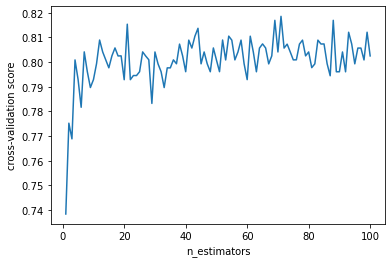

In [21]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

scores = []
for n in tqdm(range(1, 101)):
    model = RandomForestClassifier(n_estimators = n)
    scores.append(cross_validate(model, X_train, y_train)['test_score'].mean())
crossval_score['RandomForest'] = (max(scores), np.argmax(np.asarray(scores))+1)
plt.plot(range(1, 101), scores)
plt.xlabel('n_estimators')
plt.ylabel('cross-validation score')
plt.show()

100%|██████████| 100/100 [00:15<00:00,  6.58it/s]


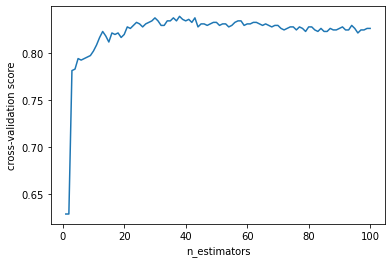

In [22]:
scores = []
for n in tqdm(range(1, 101)):
    model = GradientBoostingClassifier(n_estimators = n)
    scores.append(cross_validate(model, X_train, y_train)['test_score'].mean())
crossval_score['GradientBoosting'] = (max(scores), np.argmax(np.asarray(scores))+1)
plt.plot(range(1, 101), scores)
plt.xlabel('n_estimators')
plt.ylabel('cross-validation score')
plt.show()

## Результаты моделирования

### Задание 8 (1 балл)
Измерьте качество итоговой модели на кросс-валидации. Выполните предсказание на тестовом множестве и сохраните их в переменную ``y_test``. Измерьте итоговое качество на тестовом множестве.

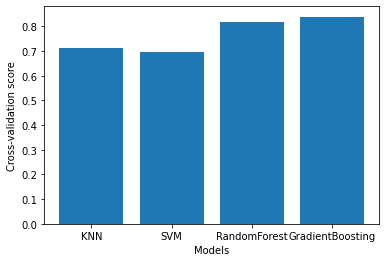

In [23]:
models = crossval_score.keys()
plt.bar(models, [crossval_score[m][0] for m in models])
plt.xlabel('Models')
plt.ylabel('Cross-validation score')
plt.show()

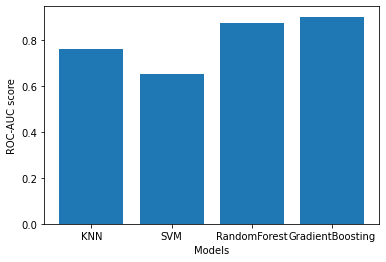

In [24]:
from sklearn.metrics import roc_auc_score

roc_auc = []
model = KNeighborsClassifier(n_neighbors = crossval_score['KNN'][1])
model.fit(X_train, y_train)
roc_auc.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
model = SVC(kernel='poly', degree=crossval_score['SVM'][1], probability=True)
model.fit(X_train, y_train)
roc_auc.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
model = RandomForestClassifier(n_estimators = crossval_score['RandomForest'][1])
model.fit(X_train, y_train)
roc_auc.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
model = GradientBoostingClassifier(n_estimators = crossval_score['GradientBoosting'][1])
model.fit(X_train, y_train)
roc_auc.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
plt.bar(models, roc_auc)
plt.xlabel('Models')
plt.ylabel('ROC-AUC score')
plt.show()

## Выводы
### Задание 9 (3 балла)
Лучший результат показали градиентный бустинг и случайный лес.
Метод ближайших соседей работает плохо, поскольку параметры пассажиров не являются однородными.
Метод опроных векторов работает плохо, поскольку множество выживших плохо приближается алгебраическим.